## 모듈 불러오기

In [132]:
import numpy as np
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

## 데이터 불러오기

In [2]:
train = pd.read_csv('./data/train.csv', index_col='ID')

In [3]:
train.shape

(30200, 13)

In [4]:
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
ID,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [5]:
test = pd.read_csv('./data/test.csv', index_col='ID')

In [6]:
test.shape

(12943, 12)

In [7]:
test.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수
ID,,,,,,,,,,,,
TEST_00000,110,0,210.7,142,35.6,205.9,93,17.43,120.9,111,5.37,2
TEST_00001,283,1,268.5,100,30.3,283.0,92,28.32,290.0,89,8.82,0
TEST_00002,34,1,243.3,205,21.3,225.7,205,29.00,92.6,29,2.44,2
TEST_00003,209,86,83.0,93,24.1,270.6,220,22.89,266.9,81,2.80,6
TEST_00004,202,0,293.2,23,31.0,294.0,24,26.39,223.8,33,6.66,2


## 데이터 전처리

In [8]:
train.columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

In [79]:
# X = np.log1p(train.drop(columns='전화해지여부')).copy(deep=True)
X = np.log1p(train[['주간통화시간', '주간통화횟수', '주간통화요금']]).copy()

In [80]:
X.shape

(30200, 3)

In [81]:
X.head()

,주간통화시간,주간통화횟수,주간통화요금
ID,,,
TRAIN_00000,4.607168,4.543295,3.342862
TRAIN_00001,5.783517,5.780744,4.439116
TRAIN_00002,5.646859,5.780744,3.561046
TRAIN_00003,5.404478,5.411646,3.261935
TRAIN_00004,4.577799,5.407172,3.391147


## 파생 변수 생성

In [124]:
train['통화시간'] = train['주간통화시간'] + train['저녁통화시간'] + train['밤통화시간']
train['통화횟수'] = train['주간통화횟수'] + train['저녁통화횟수'] + train['밤통화횟수']
train['통화요금'] = train['주간통화요금'] + train['저녁통화요금'] + train['밤통화요금']

In [125]:
train.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부,통화시간,통화횟수,통화요금
ID,,,,,,,,,,,,,,,,
TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0,630.9,489,89.11
TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0,916.1,858,148.11
TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0,770.2,973,75.30
TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0,658.2,518,58.36
TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0,583.3,514,59.58


In [126]:
train[['통화시간', '통화횟수', '통화요금']].describe()

,통화시간,통화횟수,통화요금
count,30200.000000,30200.000000,30200.000000
mean,777.248957,474.697682,78.560356
std,192.815336,198.109400,28.954492
min,264.700000,72.000000,17.040000
25%,678.800000,331.000000,57.400000
50%,735.300000,466.000000,68.890000
75%,829.800000,576.000000,95.830000
max,1432.100000,1427.000000,184.240000


array([[<AxesSubplot:title={'center':'통화시간'}>,
        <AxesSubplot:title={'center':'통화횟수'}>],
       [<AxesSubplot:title={'center':'통화요금'}>, <AxesSubplot:>]],
      dtype=object)

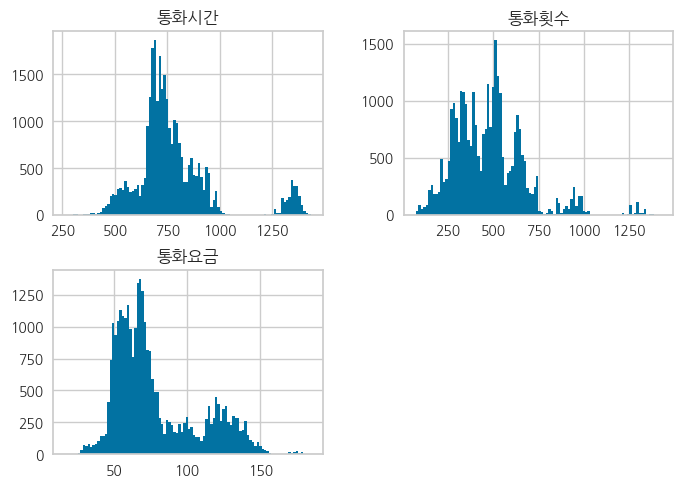

In [133]:
train[['통화시간', '통화횟수', '통화요금']].hist(bins=100)

In [135]:
X = train[['통화시간', '통화횟수', '통화요금']].copy()

## Elbow Method

In [136]:
inertia = []
silhouettes = []
range_n_clusters = range(2, 20)

In [137]:
kmeans = KMeans(random_state=42)

In [138]:
kmeans.fit(X)
# 3개 군집의 중심점, 군집의 
kmeans.cluster_centers_, kmeans.inertia_

(array([[ 872.87914062,  431.95833333,   90.01482812],
        [ 711.30114172,  484.50297841,   72.33273698],
        [1329.99264184, 1056.65780142,  119.33663121],
        [ 726.49349986,  275.50879932,   73.5251124 ],
        [1342.11047794,  514.23345588,  120.05301471],
        [ 709.34858708,  650.20069204,   75.35880283],
        [ 536.71195754,  340.66937246,   54.67515423],
        [ 899.5219924 ,  732.0953989 ,   94.6612157 ]]),
 316847280.33713937)

In [139]:
for n_cluster in range_n_clusters:
    # 모델 객체 생성
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    
    # 평균, 표준 편차 계산
    kmeans.fit(X)
    
    # 각
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, labels=kmeans.labels_))
    print(n_cluster, end=', ')

2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 

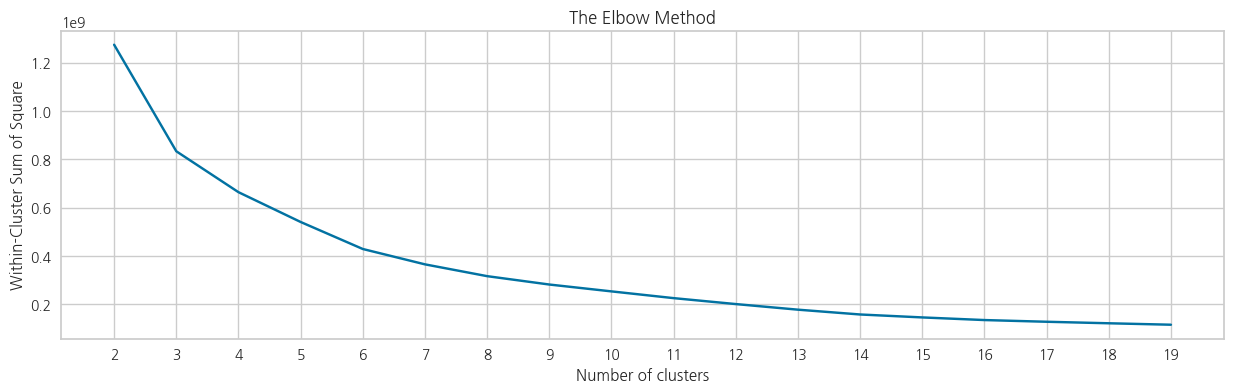

In [140]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.xticks(range_n_clusters)
plt.show()

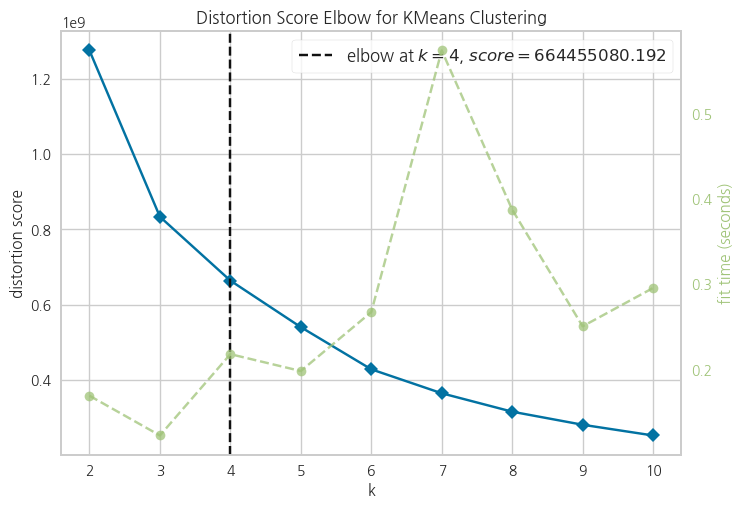

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [163]:
KEV = KElbowVisualizer(kmeans, k=10, n_init='auto')
KEV.fit(X)
KEV.show()

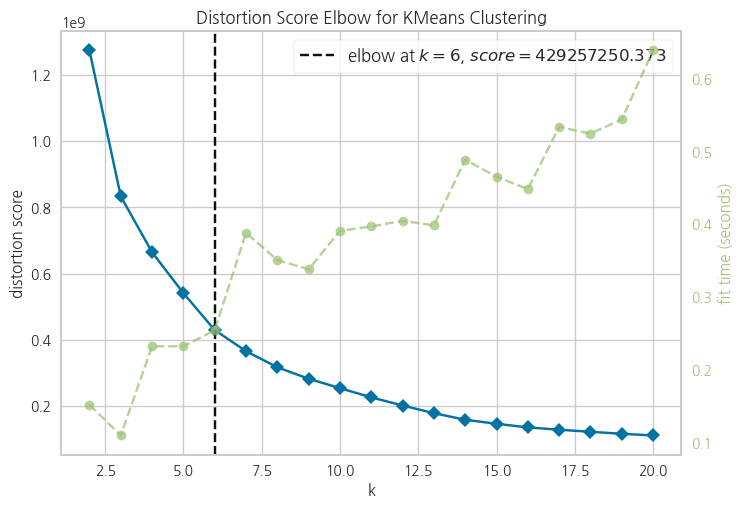

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [164]:
KEV = KElbowVisualizer(kmeans, k=20, n_init='auto')
KEV.fit(X)
KEV.show()

## Silhouette Method

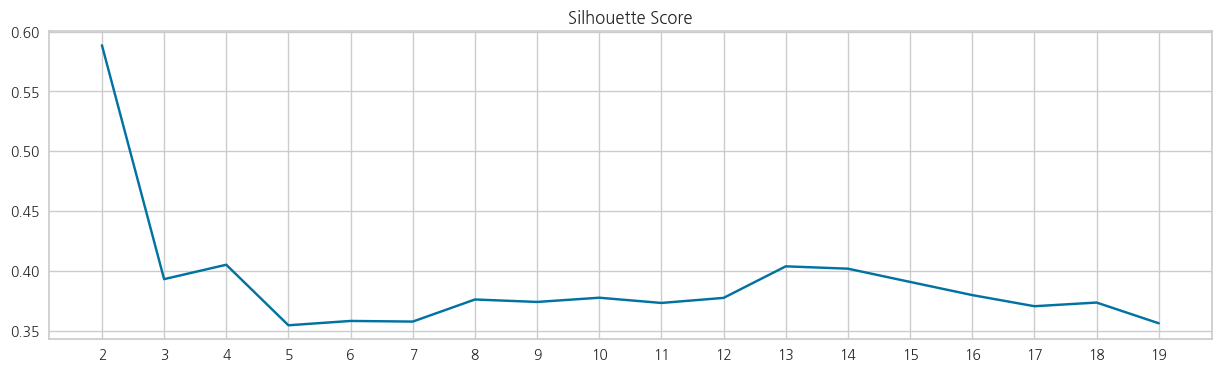

In [143]:
plt.figure(figsize=(15, 4))
plt.title('Silhouette Score')
plt.plot(range_n_clusters, silhouettes)
plt.xticks(range_n_clusters)
plt.show()

## K-means

In [222]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [223]:
kmeans.labels_

array([2, 2, 2, ..., 1, 2, 2], dtype=int32)

In [224]:
kmeans.cluster_centers_

array([[1306.09908752,  804.43094152,  118.10637495],
       [ 697.98720193,  317.57609568,   71.10457788],
       [ 763.88285735,  571.28914464,   79.05024136]])

In [225]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0     2410
1    13728
2    14062
dtype: int64

In [226]:
silhouette_avg = silhouette_score(X, kmeans.labels_)

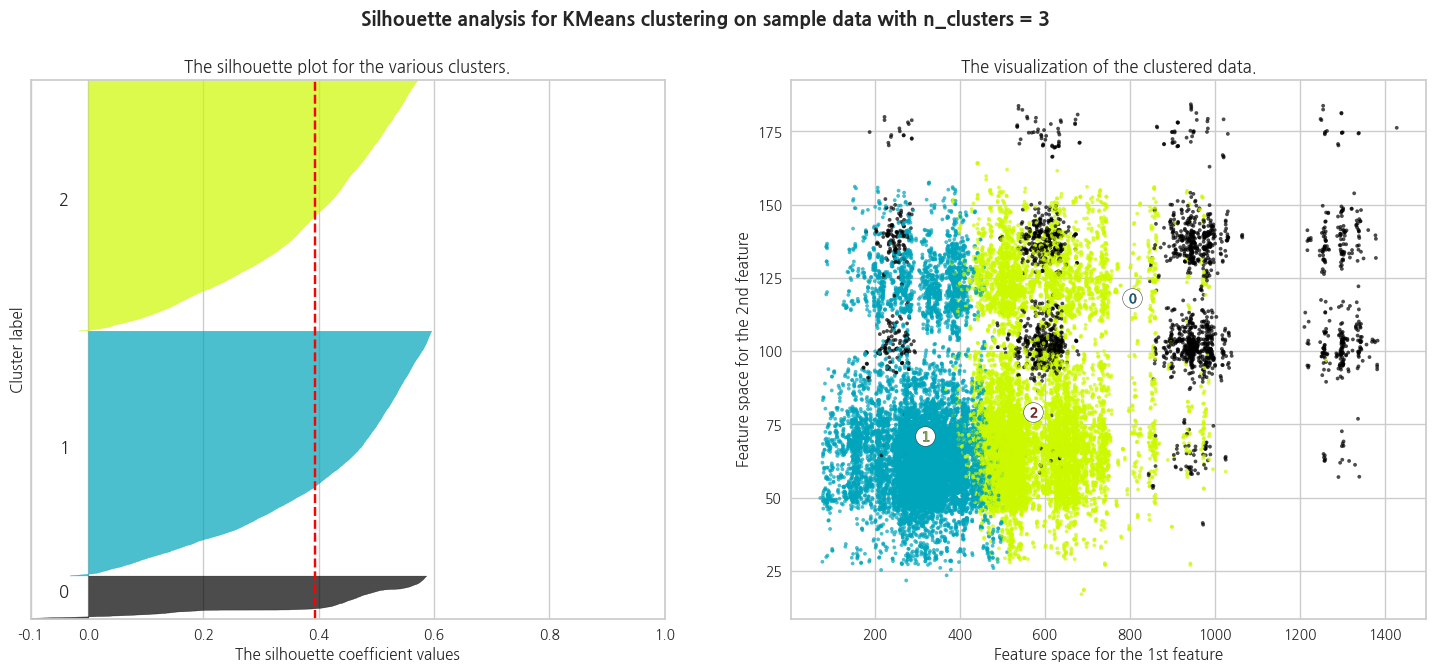

In [227]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X.loc[:, '통화횟수'], X.loc[:, '통화요금'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 1],
    centers[:, 2],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[1], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()

In [228]:
train.loc[(train['통화요금'] >= 165) & (train['통화횟수'] <= 400)]

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부,통화시간,통화횟수,통화요금
ID,,,,,,,,,,,,,,,,
TRAIN_04151,91,0,451.0,45,81.7,441.9,99,44.94,447.3,88,44.46,4,0,1340.2,232,171.10
TRAIN_04349,49,1,446.4,100,84.8,446.9,84,44.48,449.2,84,44.40,8,0,1342.5,268,173.68
TRAIN_04465,469,49,450.8,99,86.8,440.7,100,44.88,444.5,88,40.94,4,0,1336.0,287,172.62
TRAIN_05800,469,48,451.5,100,86.6,440.7,99,44.88,445.6,88,40.94,4,0,1337.8,287,172.42
TRAIN_06155,450,1,444.5,95,84.8,449.2,45,48.48,447.7,99,40.44,8,0,1341.4,239,173.72
TRAIN_06321,441,1,481.1,80,82.0,445.3,84,49.06,469.3,94,44.94,8,0,1395.7,258,176.00
TRAIN_09746,48,0,445.3,95,84.5,441.3,95,48.48,445.4,90,44.48,4,1,1332.0,280,177.46
TRAIN_09977,48,0,446.7,84,89.8,468.6,95,44.08,470.5,44,44.94,4,0,1385.8,223,178.82
TRAIN_13818,86,1,445.9,98,84.1,446.1,99,48.48,449.8,41,40.49,0,0,1341.8,238,173.07


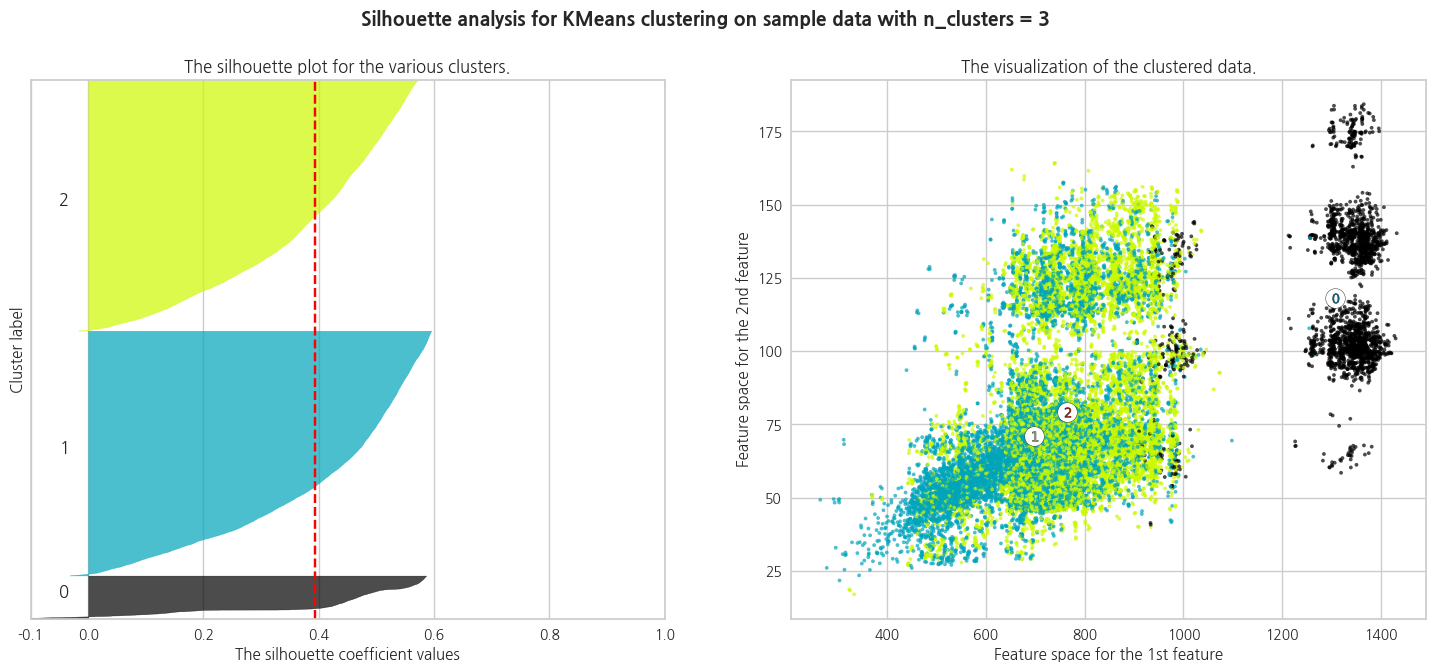

In [229]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X.loc[:, '통화시간'], X.loc[:, '통화요금'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 2],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[2], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()